# Preparazione dei dati

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as sp

In [2]:
df = pd.read_csv("train.csv", index_col = 'PassengerId')

In [3]:
df0 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df['Sex'] = df['Sex'].map({'male':'M', 'female':'F'})

In [7]:
# eliminazione variabili superflue
df.drop(columns=['Name','Ticket', 'Cabin'], inplace = True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,M,22.0,1,0,7.2500,S
2,1,1,F,38.0,1,0,71.2833,C
3,1,3,F,26.0,0,0,7.9250,S
4,1,1,F,35.0,1,0,53.1000,S
5,0,3,M,35.0,0,0,8.0500,S


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# creazione di 2 subset con sopravvissuti e deceduti
sopravvissuti = df[df['Survived'] == 1]
sopravvissuti = sopravvissuti.drop(columns = ['Survived'])

deceduti = df[df['Survived'] == 0]
deceduti = deceduti.drop(columns = ['Survived'])

In [11]:
# sns: impostazione stile e dimensioni di default
pal = 'Dark2'
st = 'darkgrid'
fig_size = {'figure.figsize':(12/1.2, 10/1.2)}

sns.set_theme(context='notebook', 
              style= st, 
              palette= pal, 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc= fig_size)

# Gestione missing values e outlier

### Missing values

In [12]:
# confronto mediana e media

print('MEDIANA')
print()
print(df.groupby(['Pclass','Sex'])['Age'].median())
print()
print()
print('MEDIA')
print()
print(df.groupby(['Pclass','Sex'])['Age'].mean())

MEDIANA

Pclass  Sex
1       F      35.0
        M      40.0
2       F      28.0
        M      30.0
3       F      21.5
        M      25.0
Name: Age, dtype: float64


MEDIA

Pclass  Sex
1       F      34.611765
        M      41.281386
2       F      28.722973
        M      30.740707
3       F      21.750000
        M      26.507589
Name: Age, dtype: float64


In [13]:
# sostituzione missing values con la mediana

for p in df['Pclass'].unique():
    for s in df['Sex'].unique():
        cond = (df['Pclass'] == p) & (df['Sex'] == s)
        df.loc[cond,'Age'] = df.loc[cond,'Age'].fillna(df.loc[cond,'Age'].median())

In [14]:
# pulizia di Age e conversione in int

df.loc[df['Age'] < 1, 'Age'] = 1
df['Age'] = df['Age'].astype('int64')

In [15]:
# sostituzione missing values di Embarked con moda

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


### Outlier

In [17]:
# osservazione delle statistiche prima del trattamento degli outlier

df['Age'].describe()

count    891.000000
mean      29.080808
std       13.309462
min        1.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

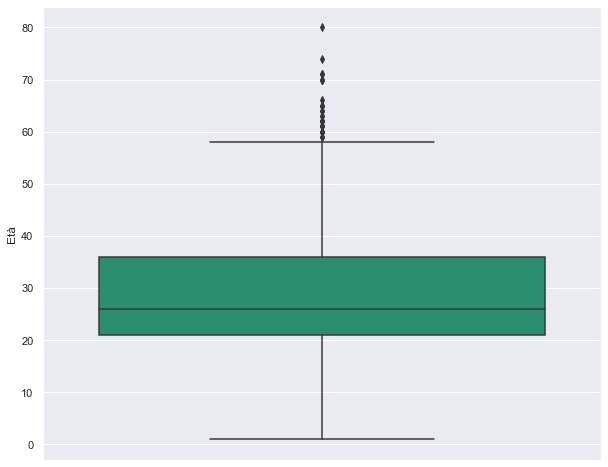

In [18]:
# visualizzazione degli outlier di Age tramite boxplot

x = ''
y = 'Age'
h = ''

ax = sns.boxplot(x=None, y=y, hue=None, data=df, order=None, hue_order=None, orient=None)
ax.set(#title = "Boxplot età", 
       xlabel = '', ylabel = 'Età')
plt.show()

In [19]:
# rimozione outlier di Age

q1 = np.quantile(df['Age'], 0.25)
q3 = np.quantile(df['Age'], 0.75)
iqr = q3 - q1
cond = (df['Age'] > q3 + 1.5 * iqr)

print('Numero di outlier:', len(df[cond])) 

df.drop(index = df[cond].index, inplace = True)

Numero di outlier: 28


In [20]:
# osservazione delle statistiche dopo la rimozione degli outlier 

df['Age'].describe()

count    863.000000
mean      27.926999
std       11.817463
min        1.000000
25%       21.000000
50%       25.000000
75%       35.000000
max       58.000000
Name: Age, dtype: float64

__________________________________________________

In [21]:
# correlazione tra Fare e Pclass

np.corrcoef(df['Fare'],df['Pclass'])

array([[ 1.        , -0.55401285],
       [-0.55401285,  1.        ]])

In [22]:
# osservazione delle statistiche prima del trattamento degli outlier

df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,86.215306,79.731316,0.0,31.00,61.3792,107.6625,512.3292
2,179.0,20.770065,13.459344,0.0,13.00,14.5000,26.0000,73.5000
3,485.0,13.749165,11.831642,0.0,7.75,8.0500,15.5000,69.5500


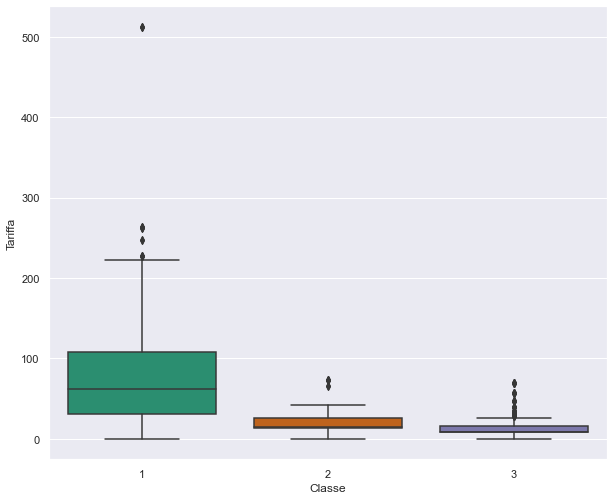

In [23]:
# visualizzazione degli outlier di Fare tramite boxplot

x = 'Pclass'
y = 'Fare'
h = ''

ax = sns.boxplot(x=x, y=y, hue=None, data=df, order=None, hue_order=None, orient=None)
ax.set(#title = 'Boxplot tariffa per classe', 
       xlabel = 'Classe', ylabel = 'Tariffa')
plt.show()

In [24]:
# sostituzione outlier con mediana per classe

for p in df['Pclass'].unique():
    
    print('Pclass:', p)
    print()
    
    # calcolo quantili e iqr
    q1 = np.quantile(df[df['Pclass'] == p]['Fare'], 0.25)
    q3 = np.quantile(df[df['Pclass'] == p]['Fare'], 0.75)
    iqr = q3 - q1
    
    print('Q1:', q1)
    print('Q3:', q3)
    print('IQ3', iqr)
    print()
        
    # sostituzione outlier in base alla condizione (seleziono la classe e la soglia specifica)    
    cond1 = (df['Pclass'] == p)
    cond2 = (df['Fare'] > q3 + 1.5 * iqr )
    
    print('Numero di outlier:', len(df[cond1 & cond2]))
    print()
    print('Mediana:', df[cond1]['Fare'].median())
    print()
    print()
    
    df.loc[cond1 & cond2, 'Fare'] = df[cond1]['Fare'].median()

Pclass: 3

Q1: 7.75
Q3: 15.5
IQ3 7.75

Numero di outlier: 52

Mediana: 8.05


Pclass: 1

Q1: 31.0
Q3: 107.6625
IQ3 76.6625

Numero di outlier: 14

Mediana: 61.3792


Pclass: 2

Q1: 13.0
Q3: 26.0
IQ3 13.0

Numero di outlier: 7

Mediana: 14.5




In [25]:
# osservazione delle statistiche dopo il trattamento degli outlier

df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,69.147113,43.630100,0.0,31.00,61.3792,86.5,221.7792
2,179.0,18.557775,8.814482,0.0,13.00,14.5000,26.0,41.5792
3,485.0,10.082679,4.596453,0.0,7.75,8.0500,9.5,25.4667


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  863 non-null    int64  
 1   Pclass    863 non-null    int64  
 2   Sex       863 non-null    object 
 3   Age       863 non-null    int64  
 4   SibSp     863 non-null    int64  
 5   Parch     863 non-null    int64  
 6   Fare      863 non-null    float64
 7   Embarked  863 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 100.7+ KB


# Statistica descrittiva

### Survived

In [27]:
# tot e valore normalizzato

x = 'Survived'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)

,Tot,%
Survived,,
0,528,61.18
1,335,38.82


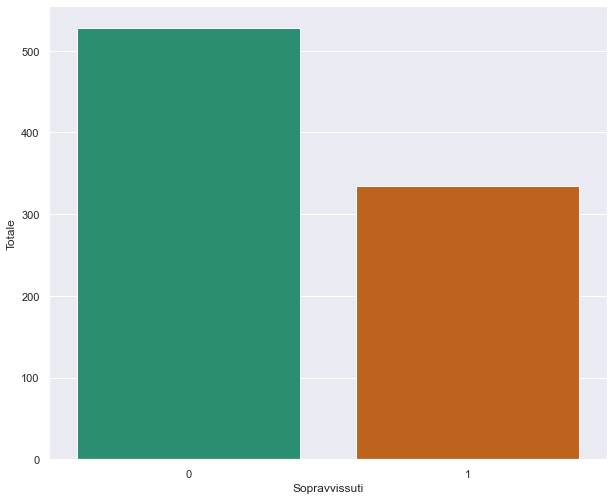

In [28]:
# barplot

x = 'Survived'

ax = sns.countplot(x=x, data=df)
ax.set(#title = 'Distribuzione sopravvissuti e deceduti', 
       xlabel = 'Sopravvissuti', ylabel = 'Totale')
plt.show()

_____________________________________

In [29]:
# statistiche età per sopravvissuti e deceduti

df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,36.005025,11.735510,1.0,28.0,36.0,44.5,58.0
2,179.0,28.921788,12.499192,1.0,23.0,29.0,35.5,57.0
3,485.0,24.245361,9.702794,1.0,20.0,25.0,28.0,55.0


In [30]:
# statistiche tariffa per sopravvissuti e deceduti

df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,69.147113,43.630100,0.0,31.00,61.3792,86.5,221.7792
2,179.0,18.557775,8.814482,0.0,13.00,14.5000,26.0,41.5792
3,485.0,10.082679,4.596453,0.0,7.75,8.0500,9.5,25.4667


### Pclass

In [31]:
# tot e percentuali

x = 'Pclass'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)

,Tot,%
Pclass,,
1,199,23.06
2,179,20.74
3,485,56.20


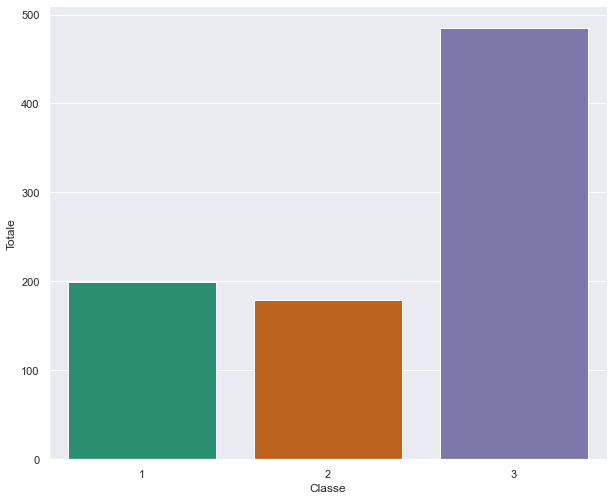

In [32]:
# barplot

x = 'Pclass'

ax = sns.countplot(x=x, data=df)
ax.set(#title = 'Distribuzione classe passeggeri', 
       xlabel = 'Classe', ylabel = 'Totale')
plt.show()

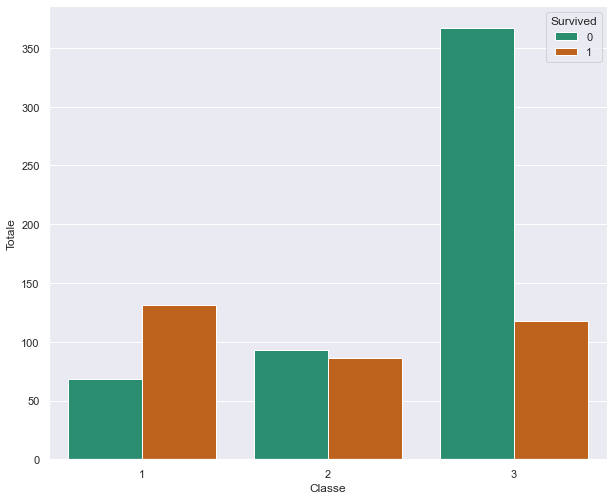

In [33]:
# stacked

x = 'Pclass'
h = 'Survived'

ax = sns.countplot(x = x, hue = h, data = df)
ax.set(#title = 'Distribuzione sopravvissuti e morti per classe', 
       xlabel = 'Classe', ylabel = 'Totale')
plt.show()

In [34]:
# percentuale

x = 'Pclass'
h = 'Survived'

round(df.groupby(x)[h].value_counts(normalize = True, sort = False).mul(100),2)

Pclass  Survived
1       0           34.17
        1           65.83
2       0           51.96
        1           48.04
3       0           75.67
        1           24.33
Name: Survived, dtype: float64

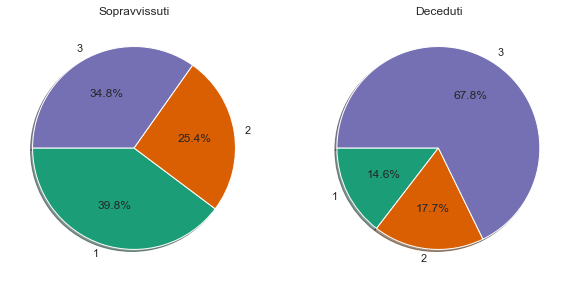

In [35]:
# piechart

x = 'Pclass'

plt.subplot(1,2,1)
labels = sopravvissuti[x].value_counts(sort=False).index
sizes = sopravvissuti[x].value_counts(sort=False)
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180) #, colors = pal)
plt.title('Sopravvissuti')

plt.subplot(1,2,2)
labels = deceduti[x].value_counts(sort=False).index
sizes = deceduti[x].value_counts(sort=False)

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180) #, colors = pal)
plt.title('Deceduti')

#plt.suptitle('Sopravvissuti e deceduti per classe')
plt.show()

__________________________________________________

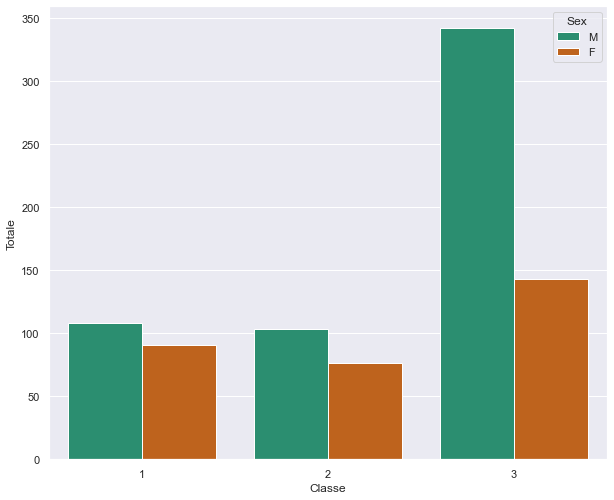

In [36]:
# stacked

x = 'Pclass'
h = 'Sex'

ax = sns.countplot(x = x, hue = h, data = df)
ax.set(#title = 'Distribuzione genere per classe', 
       xlabel = 'Classe', ylabel = 'Totale')
plt.show()

In [37]:
# percentuale

x = 'Pclass'
h = 'Sex'

round(df.groupby(x)[h].value_counts(normalize = True, sort = False).mul(100),2)

Pclass  Sex
1       F      45.73
        M      54.27
2       F      42.46
        M      57.54
3       F      29.48
        M      70.52
Name: Sex, dtype: float64

_______________________________________________________________

In [38]:
# statistiche età per classe

df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,36.005025,11.735510,1.0,28.0,36.0,44.5,58.0
2,179.0,28.921788,12.499192,1.0,23.0,29.0,35.5,57.0
3,485.0,24.245361,9.702794,1.0,20.0,25.0,28.0,55.0


In [39]:
# statistiche tariffa per classe

df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,199.0,69.147113,43.630100,0.0,31.00,61.3792,86.5,221.7792
2,179.0,18.557775,8.814482,0.0,13.00,14.5000,26.0,41.5792
3,485.0,10.082679,4.596453,0.0,7.75,8.0500,9.5,25.4667


### Sex

In [40]:
# tot e percentuali

x = 'Sex'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)

,Tot,%
Sex,,
F,310,35.92
M,553,64.08


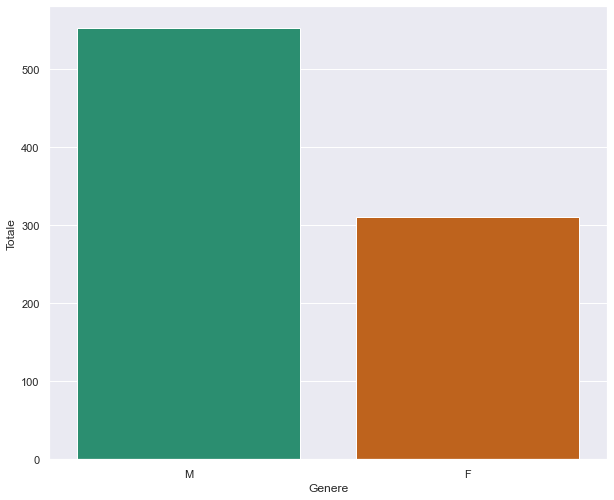

In [41]:
# barplot

x = 'Sex'

ax = sns.countplot(x=x, data=df)
ax.set(#title = 'Distribuzione genere', 
       xlabel = 'Genere', ylabel = 'Totale')
plt.show()

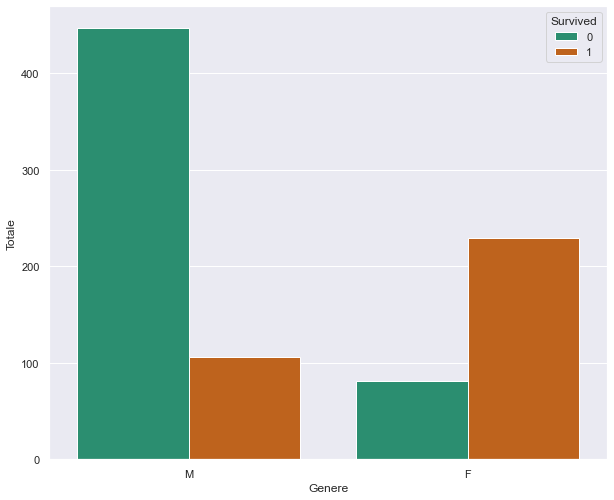

In [42]:
# stacked

x = 'Sex'
h = 'Survived'

ax = sns.countplot(x = x, hue = h, data = df)
ax.set(#title = 'Distribuzione morti e sopravvissuti per genere', 
       xlabel = 'Genere', ylabel = 'Totale')
plt.show()

In [43]:
# percentuale

round(df.groupby(x)[h].value_counts(normalize = True, sort = False).mul(100),2)

Sex  Survived
F    0           26.13
     1           73.87
M    0           80.83
     1           19.17
Name: Survived, dtype: float64

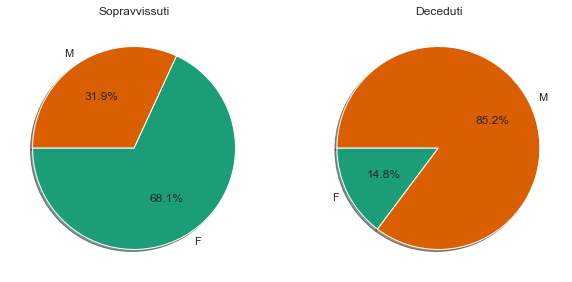

In [44]:
# piechart

x = 'Sex'

plt.subplot(1,2,1)
labels = sopravvissuti[x].value_counts(sort=False).index
sizes = sopravvissuti[x].value_counts(sort=False)
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180) #, colors = pal)
plt.title('Sopravvissuti')

plt.subplot(1,2,2)
labels = deceduti[x].value_counts(sort=False).index
sizes = deceduti[x].value_counts(sort=False)

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180) #, colors = pal)
plt.title('Deceduti')

#plt.suptitle('Morti e sopravvissuti per genere')
plt.show()

__________________________________

In [45]:
# statistiche età per genere

df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,310.0,26.741935,12.608796,1.0,21.0,24.0,35.0,58.0
M,553.0,28.591320,11.307273,1.0,23.0,26.0,36.0,58.0


In [46]:
# statistiche tariffa per genere

df.groupby('Sex')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,310.0,35.696346,40.180337,6.75,9.503125,18.0000,51.766675,211.3375
M,553.0,19.722151,25.339158,0.00,7.895800,8.6625,23.450000,221.7792


### Age

In [47]:
# statistiche generali

df['Age'].describe()

count    863.000000
mean      27.926999
std       11.817463
min        1.000000
25%       21.000000
50%       25.000000
75%       35.000000
max       58.000000
Name: Age, dtype: float64

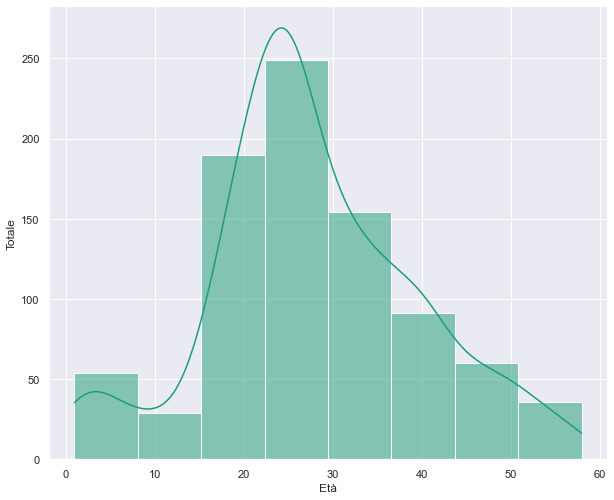

In [48]:
# hist

x  = 'Age'

ax = sns.histplot(data=df, x=x, bins = 8,kde=True)
ax.set(#title = 'Distribuzione età', 
       xlabel = 'Età', ylabel='Totale')
plt.show()

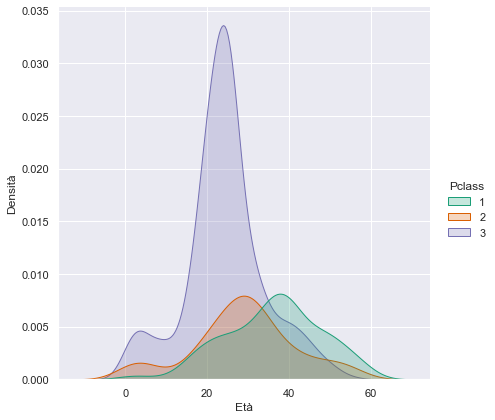

In [49]:
# density plot

x = 'Age'
h = 'Pclass'

ax = sns.displot(data = df, x=x, hue=h, kind="kde", palette = 'Dark2', fill = True, height=4*1.5, aspect=.7*1.5)
ax.set(#title = 'Età per classe', 
       xlabel = 'Età', ylabel='Densità')
plt.show()

__________________________________________________

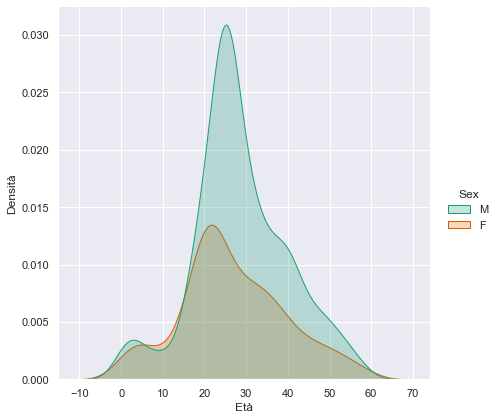

In [50]:
# density plot

x = 'Age'
h = 'Sex'

ax = sns.displot(data = df, x=x, hue=h, kind="kde", palette = 'Dark2', fill = True, height=4*1.5, aspect=.7*1.5)
ax.set(#title = 'Età per genere', 
       xlabel = 'Età', ylabel='Densità')
plt.show()

[Text(0.5, 1.0, 'Donne'), Text(0.5, 0, 'Età'), Text(0, 0.5, 'Totale')]

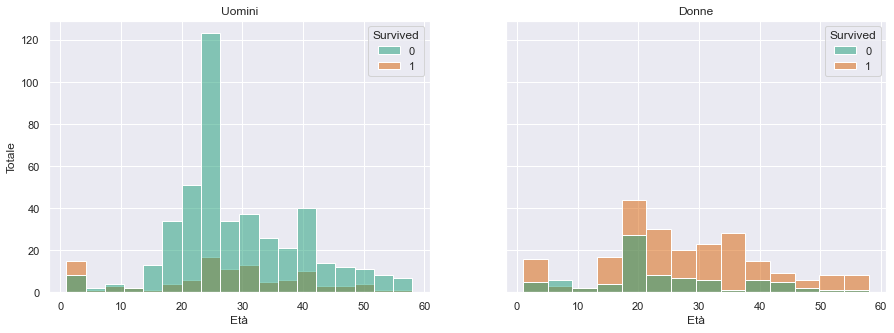

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Distribuzione deceduti e sopravvissuti per età e genere')

sns.histplot(ax=axes[0], x='Age', data = df[df['Sex'] == 'M'], hue = 'Survived')
axes[0].set(title = 'Uomini', 
       xlabel = 'Età', ylabel = 'Totale')

sns.histplot(ax=axes[1], x='Age', data = df[df['Sex'] == 'F'], hue = 'Survived')
axes[1].set(title = 'Donne', 
       xlabel = 'Età', ylabel = 'Totale')

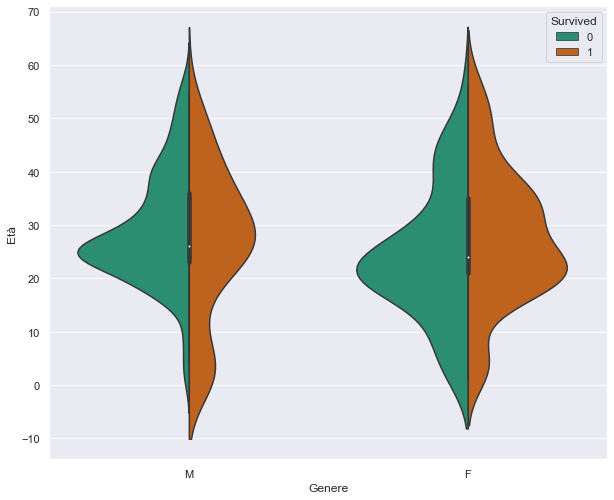

In [52]:
# violinplot

x = 'Sex'
y = 'Age'
h = 'Survived'

ax = sns.violinplot(x =x, y =y, hue =h, data = df, split = True)
ax.set(#title = '', 
       xlabel = 'Genere', ylabel='Età')
plt.show()

### Fare

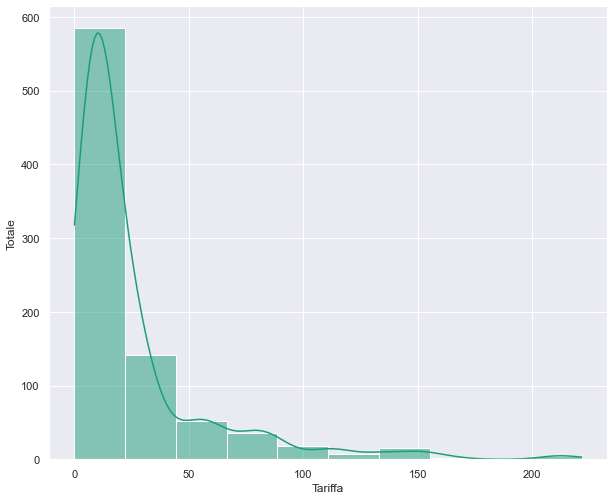

In [53]:
# hist

x  = 'Fare'

ax = sns.histplot(data=df, x=x, bins = 10, kde=True)
ax.set(#title = 'Distribuzione tariffa passeggeri', 
       xlabel = 'Tariffa', ylabel='Totale')
plt.show()

[Text(0.5, 1.0, 'Classe 3'), Text(0.5, 0, 'Tariffa'), Text(0, 0.5, 'Totale')]

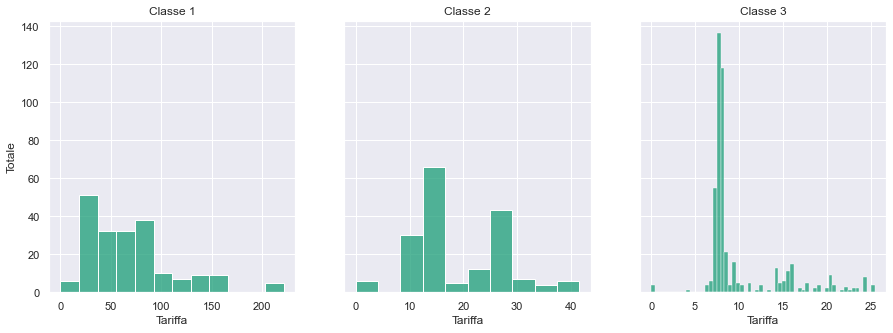

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fig.suptitle('Distribuzione tariffa per classe passeggero')

h = None

sns.histplot(ax=axes[0], x='Fare', data = df[df['Pclass'] == 1], hue = h)
axes[0].set(title = 'Classe 1', 
       xlabel = 'Tariffa', ylabel = 'Totale')

sns.histplot(ax=axes[1], x='Fare', data = df[df['Pclass'] == 2], hue = h)
axes[1].set(title = 'Classe 2', 
       xlabel = 'Tariffa', ylabel = 'Totale')

sns.histplot(ax=axes[2], x='Fare', data = df[df['Pclass'] == 3], hue = h)
axes[2].set(title = 'Classe 3', 
       xlabel = 'Tariffa', ylabel = 'Totale')

______________________________

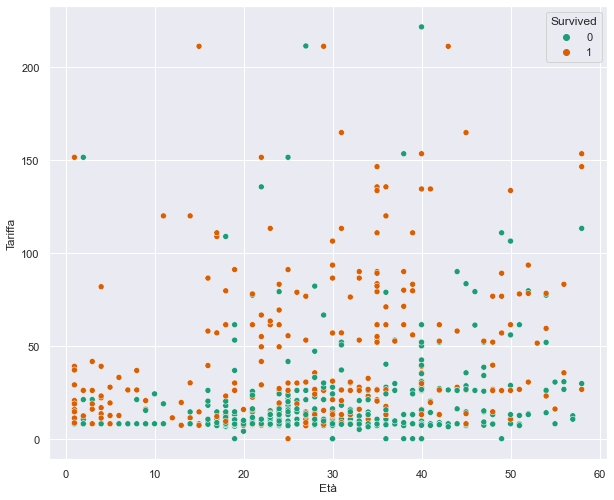

In [55]:
ax = sns.scatterplot(x='Age', y='Fare', hue='Survived', style=None, size=None, data=df)
ax.set(#title = '', 
       xlabel = 'Età', ylabel='Tariffa')
plt.show()

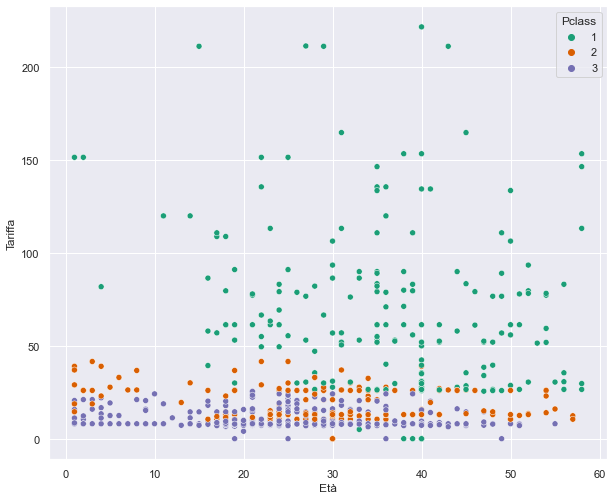

In [56]:
ax = sns.scatterplot(x='Age', y='Fare', hue='Pclass', style=None, size=None, data=df, palette = 'Dark2')
ax.set(#title = '', 
       xlabel = 'Età', ylabel='Tariffa')

plt.show()

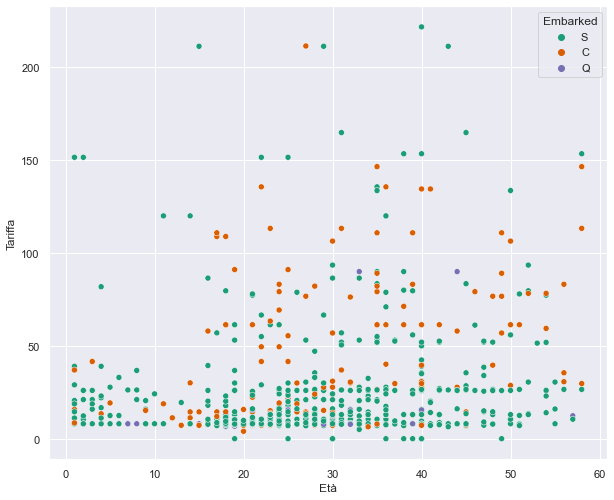

In [57]:
ax = sns.scatterplot(x='Age', y='Fare', hue='Embarked', style=None, size=None, data=df, palette = 'Dark2')
ax.set(#title = '', 
       xlabel = 'Età', ylabel='Tariffa')

plt.show()

### Embarked

In [58]:
# tot e percentuali

x = 'Embarked'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)


,Tot,%
Embarked,,
Q,75,8.69
C,163,18.89
S,625,72.42


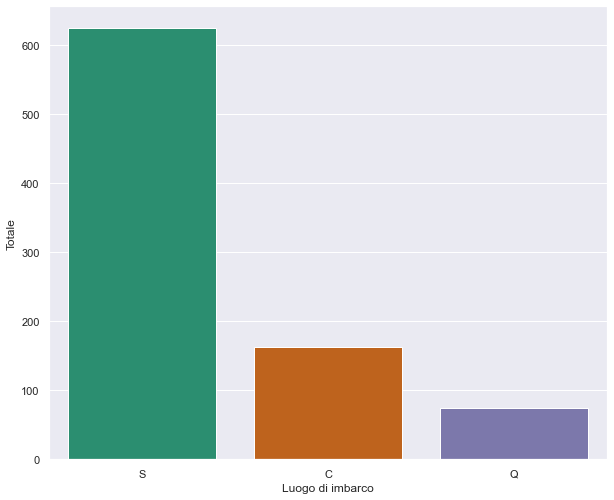

In [59]:
# barplot

x = 'Embarked'

ax = sns.countplot(x=x, data=df)
ax.set(#title = 'Distribuzione luogo di imbarco', 
       xlabel = 'Luogo di imbarco', ylabel = 'Totale')
plt.show()

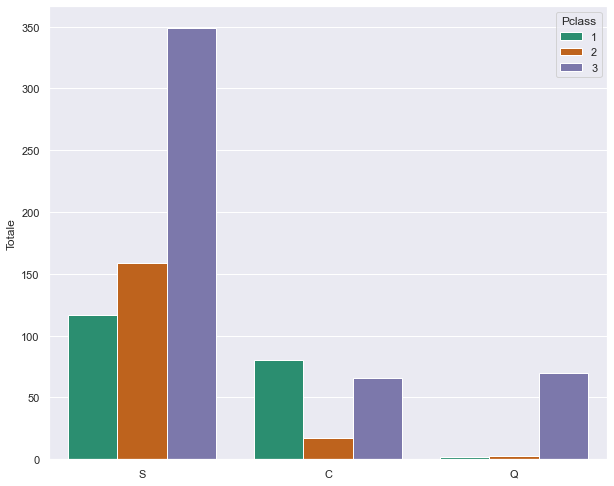

In [60]:
# stacked

x = 'Embarked'
h = 'Pclass'

ax = sns.countplot(x = x, hue = h, data = df)
ax.set(#title = 'Distribuzione luogo di imbarco per classe', 
       xlabel = '', ylabel = 'Totale')
plt.show()

In [61]:
# percentuale

x = 'Embarked'
h = 'Pclass'

round(df.groupby(x)[h].value_counts(normalize = True, sort = False).mul(100),2)

Embarked  Pclass
C         1         49.08
          2         10.43
          3         40.49
Q         1          2.67
          2          4.00
          3         93.33
S         1         18.72
          2         25.44
          3         55.84
Name: Pclass, dtype: float64

In [62]:
# statistiche età per luogo di imbarco

df.groupby('Embarked')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,163.0,29.134969,12.666430,1.0,22.0,26.0,36.5,58.0
Q,75.0,23.813333,7.861458,2.0,21.0,25.0,25.0,57.0
S,625.0,28.105600,11.894908,1.0,21.0,27.0,36.0,58.0


In [63]:
# statistiche tariffa per luogo di imbarco

df.groupby('Embarked')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,163.0,42.822090,39.140037,4.0125,13.14585,27.7500,61.3792,211.5000
Q,75.0,12.018391,13.754489,6.7500,7.75000,7.7500,8.2979,90.0000
S,625.0,22.545339,30.324407,0.0000,8.05000,10.5167,26.0000,221.7792


### SibSp e Parch

In [64]:
# tot e percentuali

x = 'SibSp'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)

,Tot,%
SibSp,,
0,586,67.90
1,203,23.52
2,28,3.24
3,16,1.85
4,18,2.09
5,5,0.58
8,7,0.81


In [65]:
# tot e percentuali

x = 'Parch'

surv_stats = {'Tot':df[x].value_counts(sort=False),
             '%':round(df[x].value_counts(normalize = True, sort=False).mul(100), 2),
             x: df[x].value_counts(sort=False).index}
pd.DataFrame(surv_stats).set_index(x)

,Tot,%
Parch,,
0,655,75.90
1,114,13.21
2,80,9.27
3,5,0.58
4,3,0.35
5,5,0.58
6,1,0.12


[Text(0.5, 1.0, 'Parch'),
 Text(0.5, 0, 'Genitori/figli a bordo'),
 Text(0, 0.5, 'Totale')]

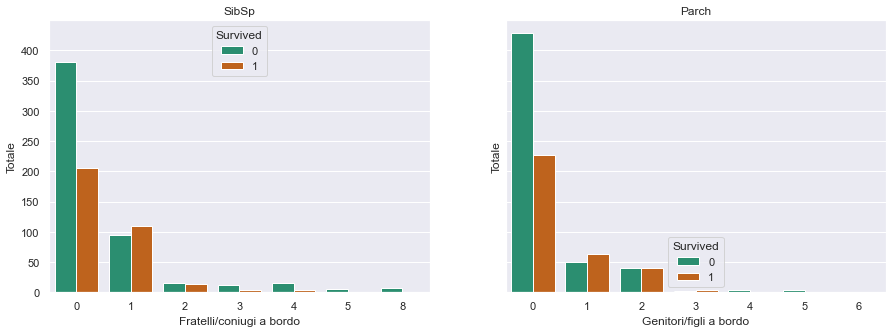

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Sopravvissuti e deceduti per SibSp e Parch')

# SibSp
sns.countplot(ax=axes[0], x='SibSp', data = df, hue = 'Survived')
axes[0].set(title = 'SibSp', 
       xlabel = 'Fratelli/coniugi a bordo', ylabel = 'Totale')

# Parch
sns.countplot(ax=axes[1], x='Parch', data = df, hue = 'Survived')
axes[1].set(title = 'Parch', 
       xlabel = 'Genitori/figli a bordo', ylabel = 'Totale')

In [67]:
# creazione di un nuovo attriubto per indicare la grandezza della famiglia (=1 non viaggiano con famigliari)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

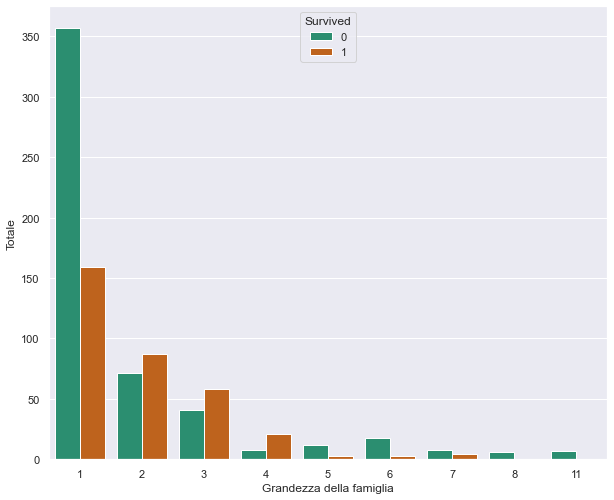

In [68]:
# stacked

x = 'FamilySize'
h = 'Survived'

ax = sns.countplot(x = x, hue = h, data = df)
ax.set(#title = 'Sopravvissuti e morti per grandezza della famiglia', 
       xlabel = 'Grandezza della famiglia', ylabel = 'Totale')
plt.show()

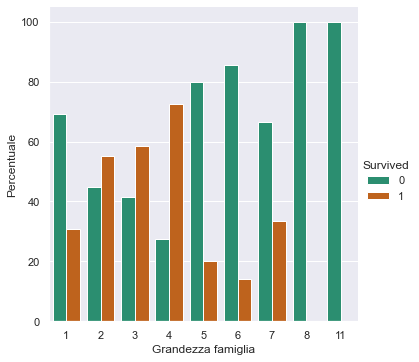

In [69]:
x = 'FamilySize'
y = 'Survived'

fs_surv = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
ax= fs_surv.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar')
ax.set(#title = 'Sopravvissuti e morti per grandezza della famiglia', 
       xlabel = 'Grandezza famiglia', ylabel='Percentuale')
plt.show()

<AxesSubplot:xlabel='FamilySize', ylabel='Percent'>

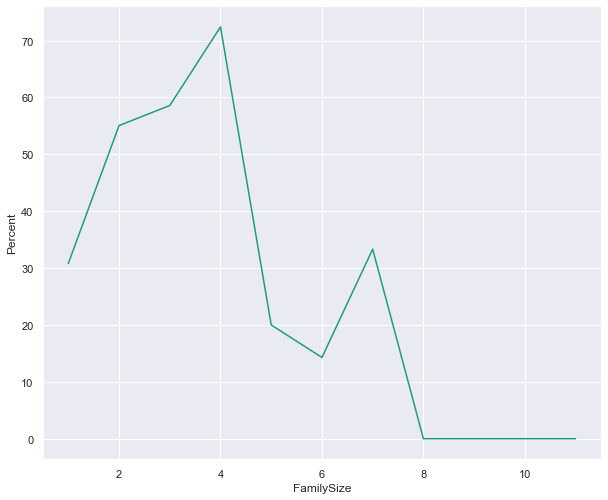

In [70]:
# lineplot del tasso di sopravvivenza per famiglia 

fs_surv_rate = fs_surv
fs_surv_rate['Percent'] = 100 - fs_surv_rate[fs_surv_rate['Survived'] == 0]['Percent']
fs_surv_rate = fs_surv_rate[fs_surv_rate['Survived']== 0].drop(columns=['Survived'])
fs_surv_rate

sns.lineplot(data=fs_surv_rate, x="FamilySize", y="Percent")

### Cabin

In [71]:
df0.loc[df0['Cabin'].isna(), 'Cabin'] = 'U' #Unknown
df0['Cabin'] = df0['Cabin'].str[0]

In [72]:
cabin = df0[df0['Cabin'] != 'U']
cabin_unknown = df0[df0['Cabin'] == 'U']

In [73]:
round(cabin['Survived'].value_counts(normalize = True, sort = False).mul(100), 2)

0    33.33
1    66.67
Name: Survived, dtype: float64

In [74]:
round(cabin_unknown['Survived'].value_counts(normalize = True, sort = False).mul(100), 2) 

0    70.01
1    29.99
Name: Survived, dtype: float64

In [75]:
cabin['Fare'].describe()

count    204.000000
mean      76.141504
std       74.391749
min        0.000000
25%       29.453125
50%       55.220850
75%       89.328150
max      512.329200
Name: Fare, dtype: float64

In [76]:
cabin['Fare'].median()

55.22085

In [77]:
cabin_unknown['Fare'].describe()

count    687.000000
mean      19.157325
std       28.663343
min        0.000000
25%        7.877100
50%       10.500000
75%       23.000000
max      512.329200
Name: Fare, dtype: float64

In [78]:
cabin_unknown['Fare'].median()

10.5

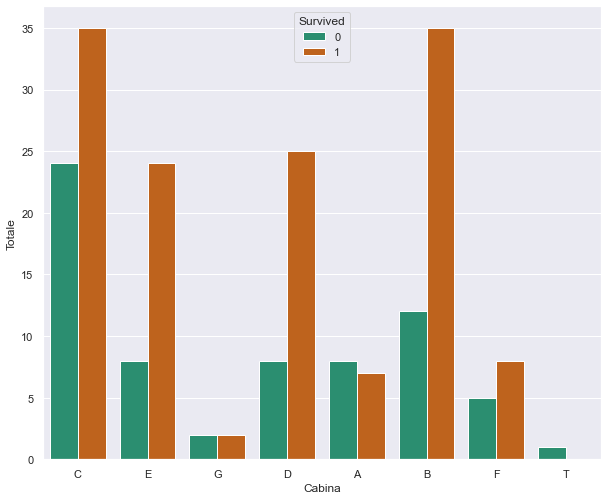

In [79]:
# stacked

x = 'Cabin'
h = 'Survived'

ax = sns.countplot(x = x, hue = h, data = cabin)
ax.set(#title = '', 
       xlabel = 'Cabina', ylabel = 'Totale')
plt.show()

# Correlazioni

In [80]:
def pearson(x,y):
    corr_pearson, p_value = sp.pearsonr(x, y)
    r2 = corr_pearson**2
    print('Coefficiente di Pearson:', corr_pearson)
    print('p-value:', p_value)
    print('R-Squared:', r2)
    print()

In [81]:
# trasformazione di Sex in variabile numerica binaria per poter fare la correlazione

df['SexN'] = df['Sex'].map({'M':0, 'F':1})

In [82]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,SexN
Survived,1.000000,-0.356877,-0.040978,-0.041681,0.085944,0.323518,0.013989,0.538535
Pclass,-0.356877,1.000000,-0.402887,0.081120,0.022581,-0.699847,0.066902,-0.148296
Age,-0.040978,-0.402887,1.000000,-0.258591,-0.191020,0.206559,-0.272288,-0.075125
SibSp,-0.041681,0.081120,-0.258591,1.000000,0.414989,0.018044,0.892473,0.109860
Parch,0.085944,0.022581,-0.191020,0.414989,1.000000,0.114291,0.780790,0.254014
Fare,0.323518,-0.699847,0.206559,0.018044,0.114291,1.000000,0.069057,0.236798
FamilySize,0.013989,0.066902,-0.272288,0.892473,0.780790,0.069057,1.000000,0.201385
SexN,0.538535,-0.148296,-0.075125,0.109860,0.254014,0.236798,0.201385,1.000000


<AxesSubplot:>

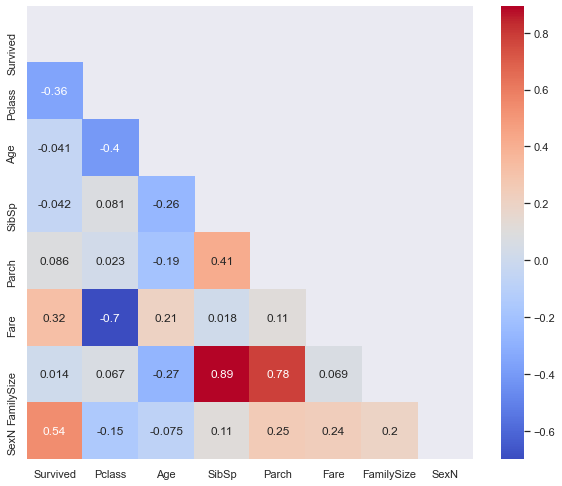

In [83]:
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm', mask = matrix)

<AxesSubplot:>

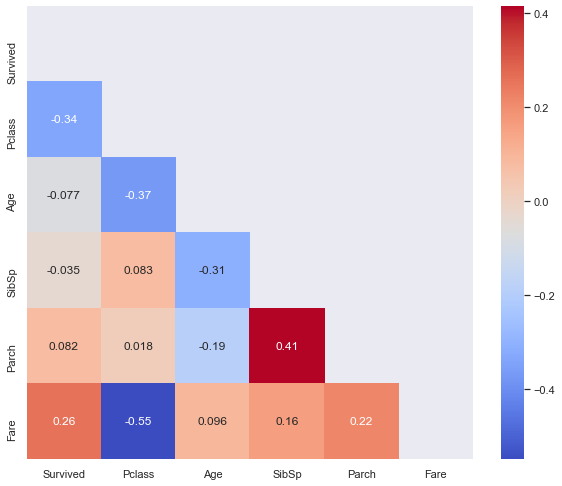

In [84]:
# correlazioni prima del trattamento di outlier e missing values

matrix = np.triu(df0.corr())

sns.heatmap(df0.corr(), annot = True, fmt='.2g',cmap= 'coolwarm', mask = matrix)

________________________________________

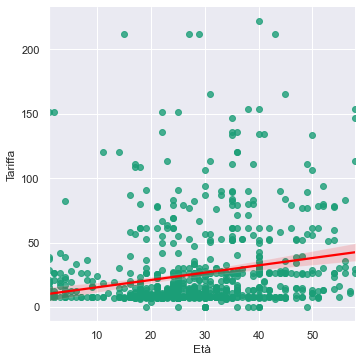

In [85]:
ax = sns.lmplot(x='Age', y='Fare', data=df, line_kws={'color':'red'})
ax.set(title='',
      xlabel = 'Età', ylabel = 'Tariffa')
plt.show()

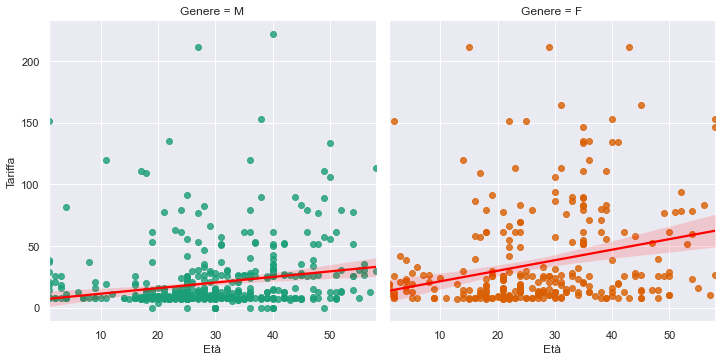

In [86]:
ax = sns.lmplot(x='Età', y='Tariffa', hue = 'Genere', data=df.rename(columns={'Fare': 'Tariffa', 'Age' : 'Età', 'Sex' : 'Genere'}), 
                line_kws={'color':'red'}, col='Genere')
plt.show()

In [87]:
x = df[df['Sex'] == 'F']['Age']
y = df[df['Sex'] == 'F']['Fare']

pearson(x,y)

Coefficiente di Pearson: 0.26857832909556734
p-value: 1.601360195094632e-06
R-Squared: 0.07213431885976687



In [86]:
x = df[df['Sex'] == 'M']['Age']
y = df[df['Sex'] == 'M']['Fare']

pearson(x,y)

Coefficiente di Pearson: 0.20209750562515397
p-value: 1.6571405758947028e-06
R-Squared: 0.04084340177990914



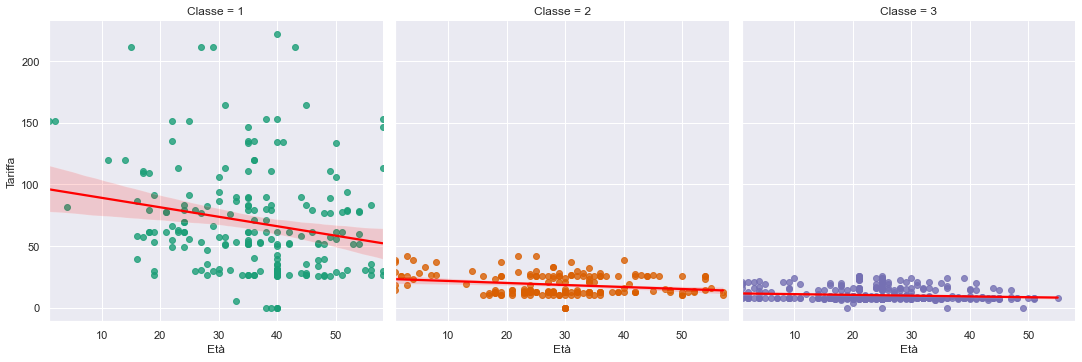

In [87]:
ax = sns.lmplot(x='Età', y='Tariffa', hue = 'Classe', data=df.rename(columns={'Fare': 'Tariffa', 'Age' : 'Età', 'Pclass' : 'Classe'}), 
                line_kws={'color':'red'}, col='Classe')
plt.show()

In [88]:
x = df[df['Pclass'] == 3]['Age']
y = df[df['Pclass'] == 3]['Fare']

pearson(x,y)

Coefficiente di Pearson: -0.13153340832716415
p-value: 0.0037094763333884303
R-Squared: 0.017301037506160494



In [89]:
x = df[df['Pclass'] == 2]['Age']
y = df[df['Pclass'] == 2]['Fare']

pearson(x,y)

Coefficiente di Pearson: -0.23141324483500963
p-value: 0.0018280892707814133
R-Squared: 0.05355208988506811



In [90]:
x = df[df['Pclass'] == 1]['Age']
y = df[df['Pclass'] == 1]['Fare']

pearson(x,y)

Coefficiente di Pearson: -0.20654298682254243
p-value: 0.003423381050079671
R-Squared: 0.04266000540557694



___________________________________________________________________

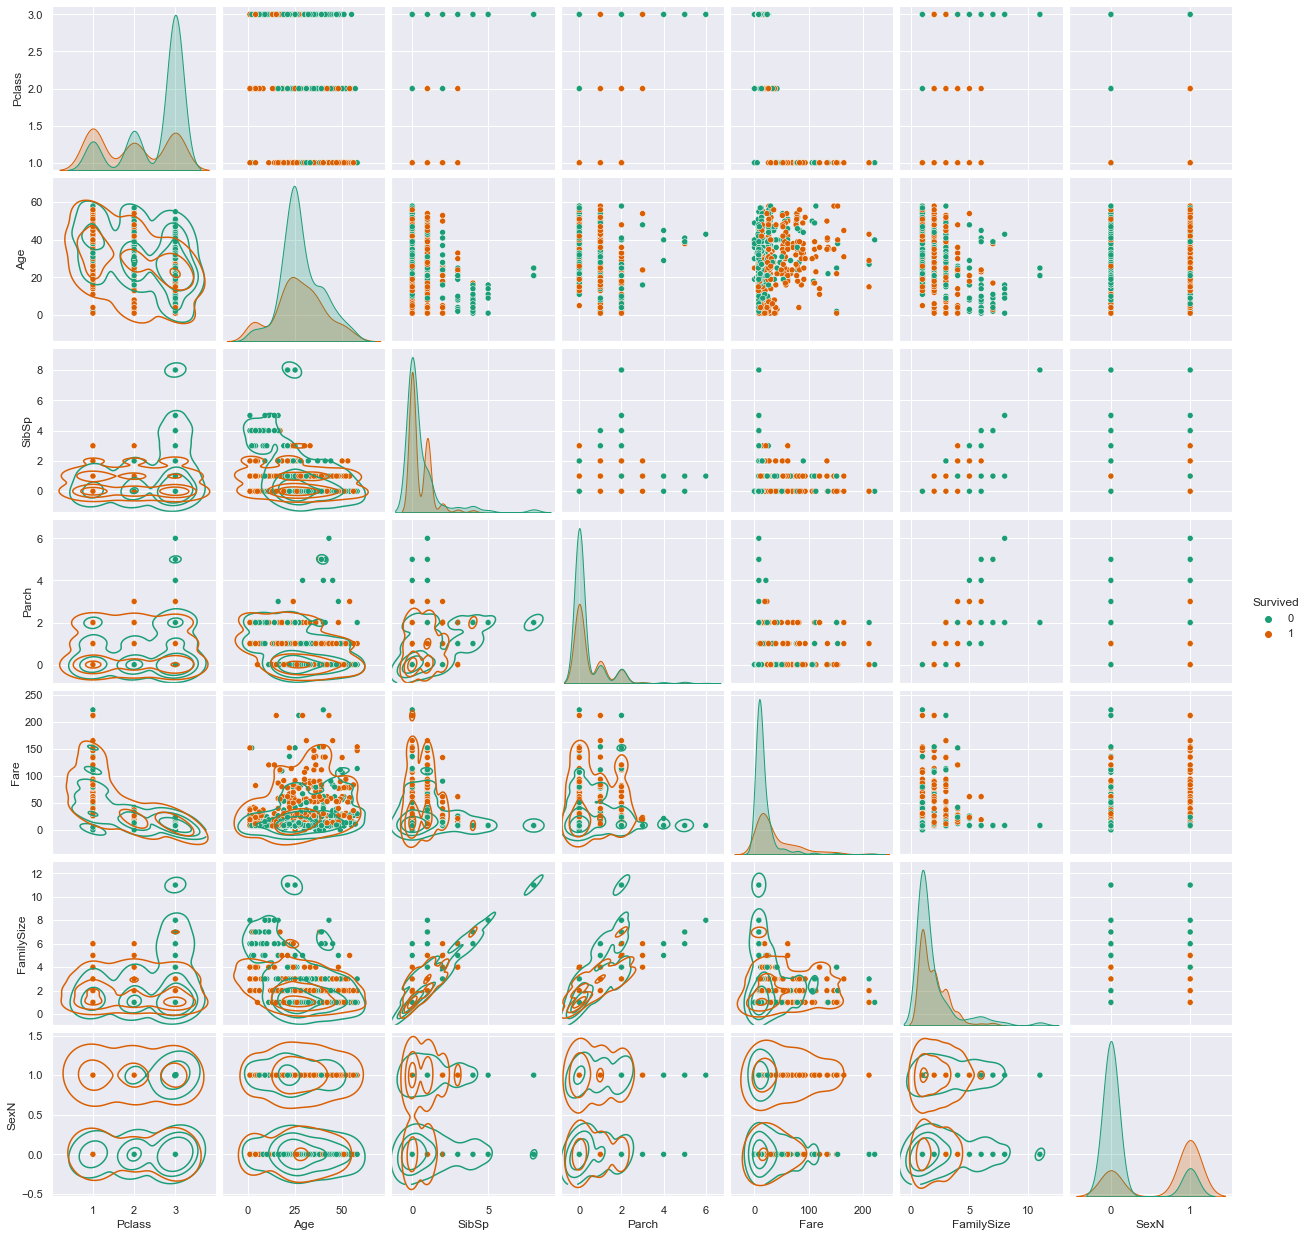

In [91]:
g=sns.pairplot(df, hue='Survived', diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

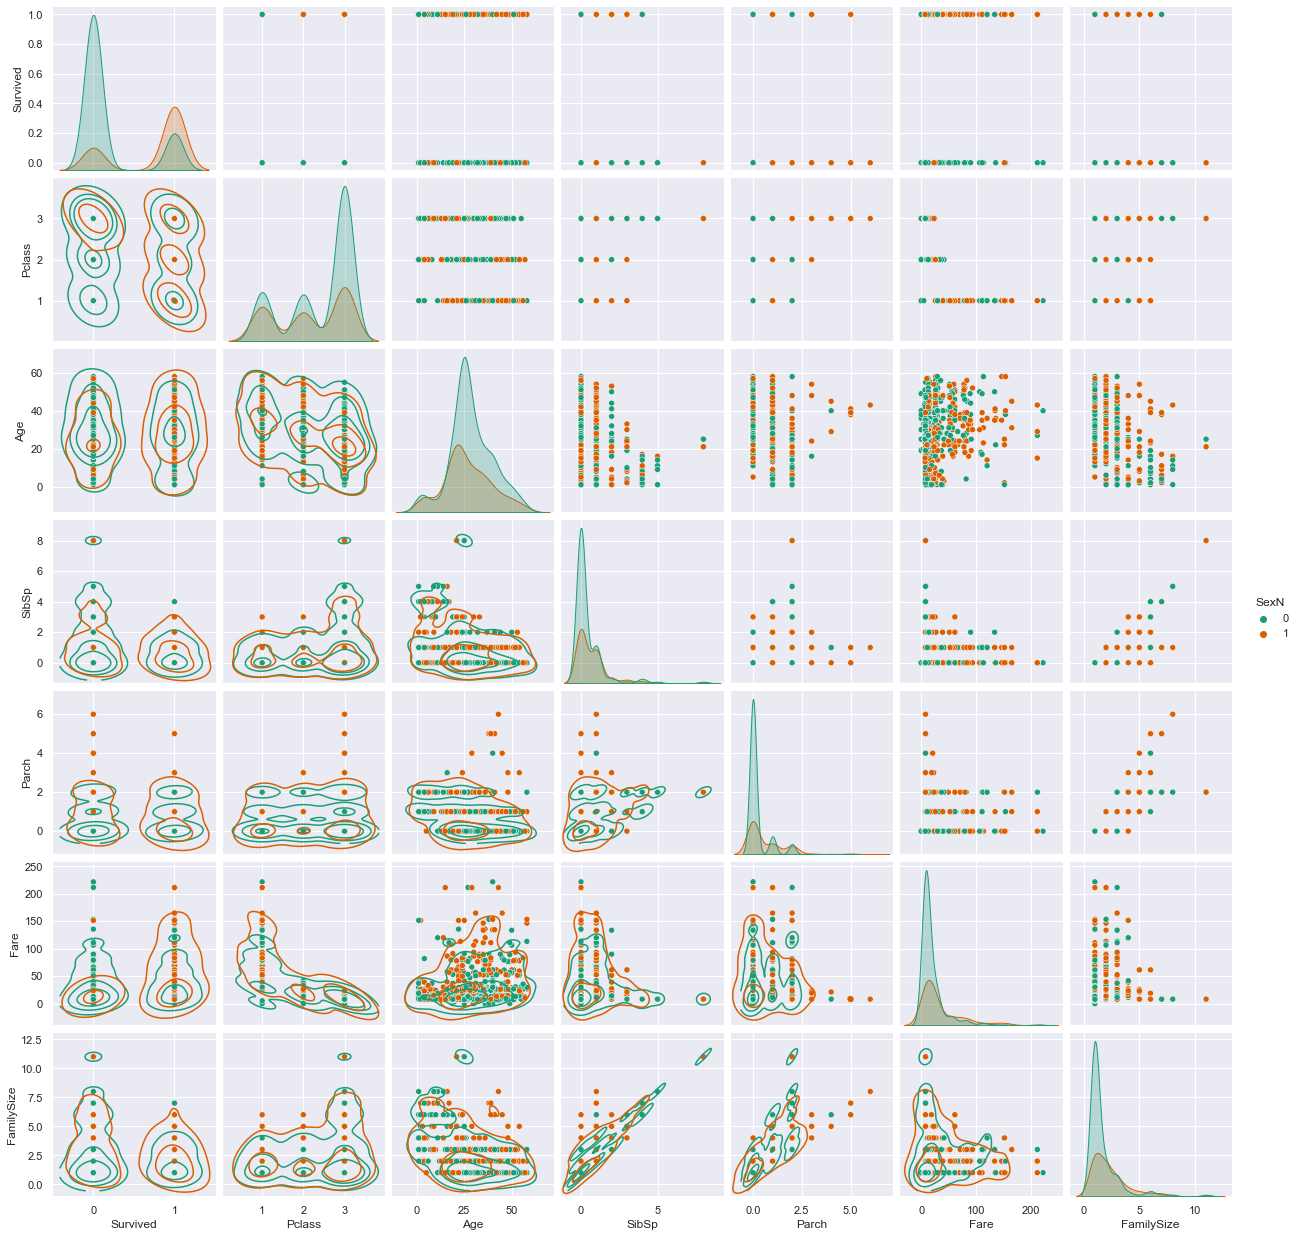

In [92]:
g=sns.pairplot(df, hue='SexN', diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

__________________________________________________________________

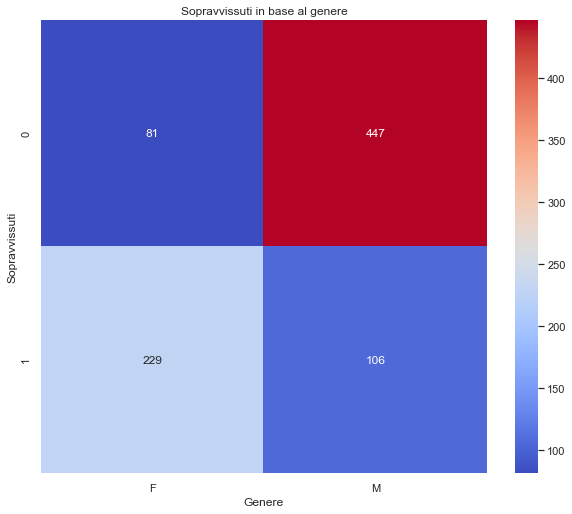

In [93]:
#Heatmap sopravvissuti/genere
gruppo=df.groupby(['Survived', 'Sex'])
classe_sopr =gruppo.size().unstack()

ax = sns.heatmap(classe_sopr, annot= True, fmt="0", cmap= 'coolwarm')
ax.set(title = "Sopravvissuti in base al genere",
       xlabel = "Genere", ylabel = "Sopravvissuti")
plt.show()

In [94]:
x = df['SexN']
y = df['Survived']

pearson(x,y)

Coefficiente di Pearson: 0.5385345337594957
p-value: 4.6075953995180556e-66
R-Squared: 0.2900194440515574



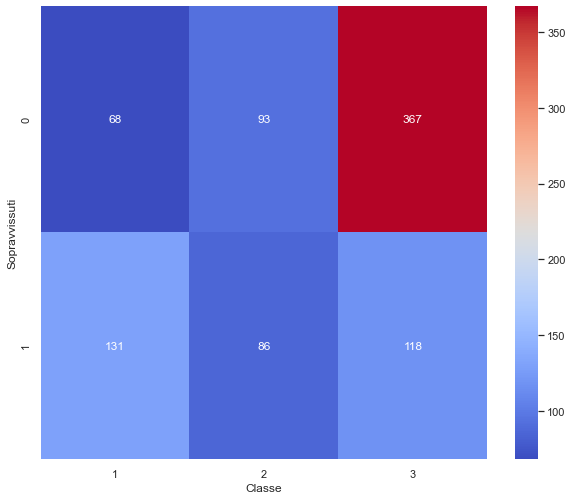

In [95]:
#Heatmap sopravvissuti/classe
gruppo=df.groupby(['Survived', 'Pclass'])
classe_sopr =gruppo.size().unstack()

ax = sns.heatmap(classe_sopr, annot= True, fmt="0", cmap= 'coolwarm')
ax.set(#title = "Sopravvissuti in base alla classe",
       xlabel = "Classe", ylabel = "Sopravvissuti")
plt.show()

In [96]:
x = df['Survived']
y = df['Pclass']

pearson(x,y)

Coefficiente di Pearson: -0.35687681345882866
p-value: 2.556832011803011e-27
R-Squared: 0.1273610599845276



______________________________________________________________________

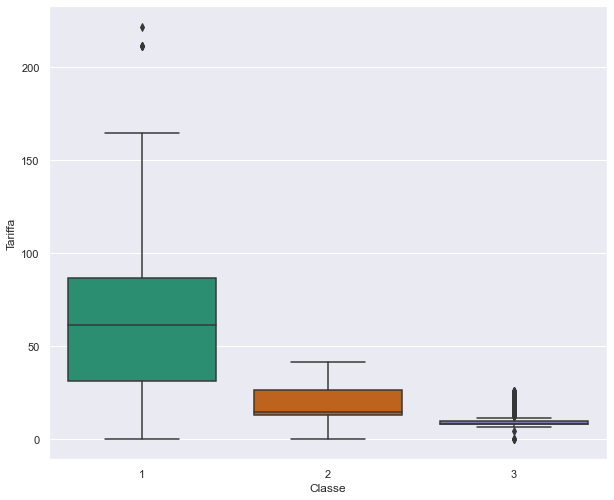

In [97]:
# visualizzazione del rapporto fra Pclass e Fare tramite boxplot

x = 'Pclass'
y = 'Fare'
h = ''

ax = sns.boxplot(x=x, y=y, hue=None, data=df, order=None, hue_order=None, orient=None)
ax.set(#title = '', 
       xlabel = 'Classe', ylabel = 'Tariffa')
plt.show()

In [98]:
x = df['Pclass']
y = df['Fare']

pearson(x,y)

Coefficiente di Pearson: -0.699847189160594
p-value: 5.972415484754641e-128
R-Squared: 0.4897860881759842



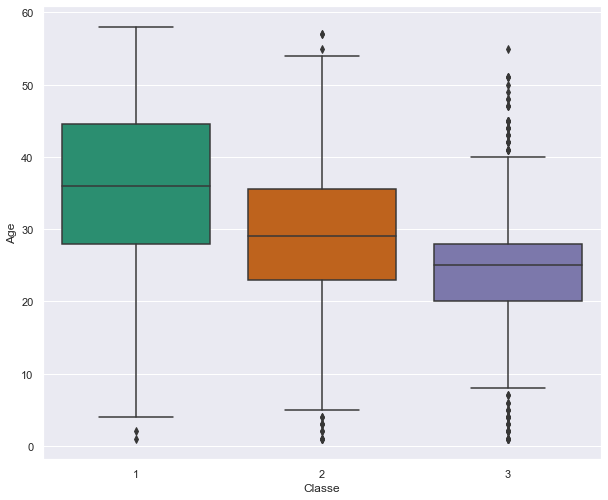

In [99]:
# visualizzazione del rapporto fra Pclass e Age tramite boxplot

x = 'Pclass'
y = 'Age'
h = ''

ax = sns.boxplot(x=x, y=y, hue=None, data=df, order=None, hue_order=None, orient=None)
ax.set(#title = '', 
       xlabel = 'Classe', ylabel = 'Age')
plt.show()

In [100]:
x = df['Pclass']
y = df['Age']

pearson(x,y)

Coefficiente di Pearson: -0.40288691937455207
p-value: 5.154509037646969e-35
R-Squared: 0.16231786980311683

